## В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.Порівняйте результати та зробіть висновки.

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU


In [10]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 250  # обмеження кількості слів в тексті
batch_size=64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, maxlen=maxlen)
print(f"Загальна кількість зразків тренувальних даних: {len(input_train)}")
print(f"Загальна кількість зразків тестових даних: {len(input_test)}")

# padding
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# truncation - зрізання речення за межами максимальної довжини
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Загальна кількість зразків тренувальних даних: 17121
Загальна кількість зразків тестових даних: 17588


In [11]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458, 4468,
         66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,  838,
        112,   50,  670,    2,    9,   35,  480,  284,    5,  150,    4,
        172,  112,  167,    2,  336,  385,   39,    4,  172, 4536, 1111,
         17,  546,   38,   13,  447,    4,  192,   50,   16,    6,  147,
       2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,   71,
         87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,    4,
         22,   17,  515,   17,   12,   16,  626,   18,    2,    5,   62,
        386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,   16,
        480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,    5,
         25,  124,   51,   36,  135,   48,   25, 14

In [12]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

# 1. Recurrent Neural Networks cheatsheet

In [13]:
rnn_model_1 = Sequential() # порожня модель Sequential

# Додавання Embedding шар для перетворення слів в вектори фіксованої довжини
rnn_model_1.add(Embedding(max_features, 32))

# Додавання SimpleRNN шару з 32 вузлами
rnn_model_1.add(SimpleRNN(32))

# Додавання Dense шару з одним вузлом та активацією sigmoid
rnn_model_1.add(Dense(1, activation='sigmoid'))

rnn_model_1.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])


In [14]:
rnn_history_1 = rnn_model_1.fit(input_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=batch_size, 
                    validation_split=0.3)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - acc: 0.5996 - loss: 0.6540 - val_acc: 0.7720 - val_loss: 0.4818
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - acc: 0.8339 - loss: 0.3992 - val_acc: 0.8517 - val_loss: 0.3552
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - acc: 0.8885 - loss: 0.2846 - val_acc: 0.8020 - val_loss: 0.4414
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.9197 - loss: 0.2148 - val_acc: 0.8528 - val_loss: 0.3513
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - acc: 0.9406 - loss: 0.1677 - val_acc: 0.8125 - val_loss: 0.4521
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.9618 - loss: 0.1091 - val_acc: 0.7964 - val_loss: 0.4883
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.9781 - loss: 0.0692 - val_acc: 0.7898 - val_loss: 0.5991
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.9861 - loss: 0.0453 - val_acc: 0.8558 - val_loss: 0.5150
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 

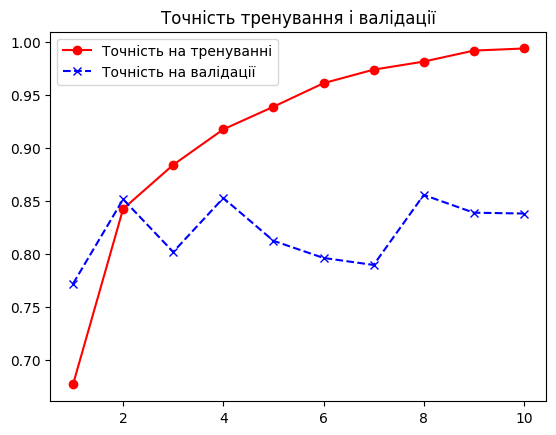

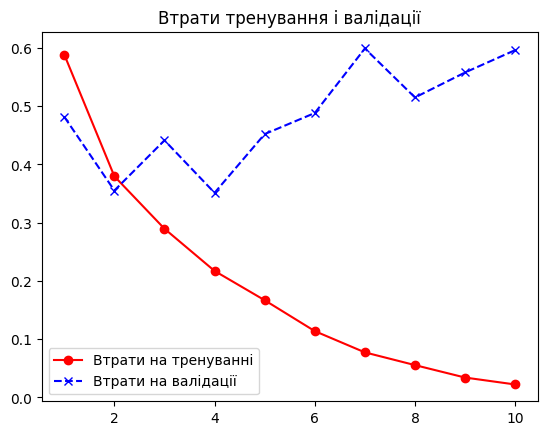

In [15]:
acc = rnn_history_1.history['acc']
loss = rnn_history_1.history['loss']

val_acc = rnn_history_1.history['val_acc']
val_loss = rnn_history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## Аналізуя результати роботи RNN моделі, модна зробити висновки що на тренувальних данних система гарно передбачає результат і має високу точність 99,06%, але показує перенавчання на валідаційних данних. 

Для того щоб уснути негативний ефект від перенавчання - додамо шар Dropout в модель

In [16]:
from keras.regularizers import l2
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

rnn_model_2 = Sequential()
rnn_model_2.add(Embedding(max_features, 32))
rnn_model_2.add(SimpleRNN(32, kernel_regularizer=l2(0.001)))
rnn_model_2.add(Dropout(0.5)) #додамо шар Dropout в модель
rnn_model_2.add(Dense(1, activation='sigmoid'))

rnn_model_2.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['acc'])

rnn_history_2 = rnn_model_2.fit(input_train, 
                            y_train, 
                            epochs=10, 
                            batch_size=batch_size, 
                            validation_split=0.3)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - acc: 0.5115 - loss: 0.7331 - val_acc: 0.5918 - val_loss: 0.6958
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.7071 - loss: 0.6178 - val_acc: 0.8030 - val_loss: 0.4714
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.8466 - loss: 0.4081 - val_acc: 0.8096 - val_loss: 0.4473
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - acc: 0.8961 - loss: 0.3093 - val_acc: 0.8511 - val_loss: 0.4018
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.9181 - loss: 0.2534 - val_acc: 0.7465 - val_loss: 0.6523
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.9377 - loss: 0.2045 - val_acc: 0.7995 - val_loss: 0.5185
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.9628 - loss: 0.1448 - val_acc: 0.8297 - val_loss: 0.4868
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - acc: 0.9767 - loss: 0.1067 - val_acc: 0.8260 - val_loss: 0.5251
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 

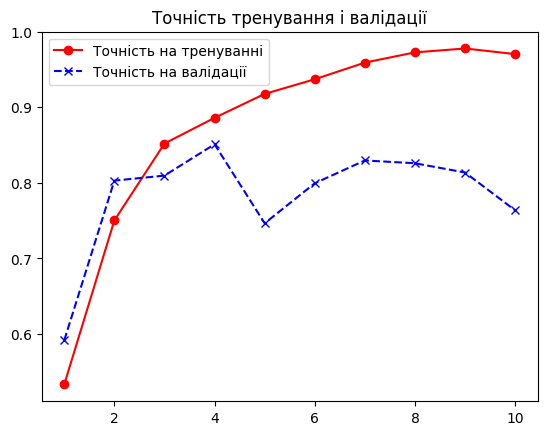

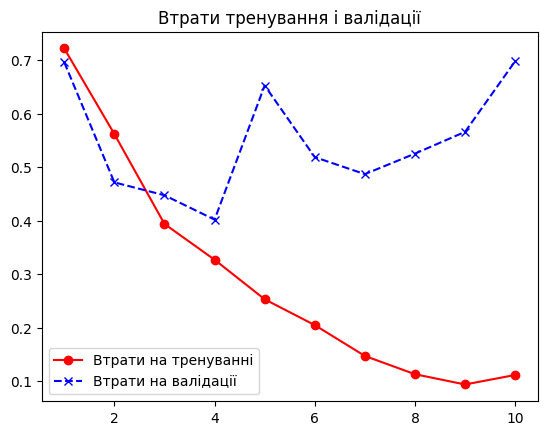

In [17]:
acc = rnn_history_2.history['acc']
loss = rnn_history_2.history['loss']

val_acc = rnn_history_2.history['val_acc']
val_loss = rnn_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

Порівняємо результати наших двох RNN моделей

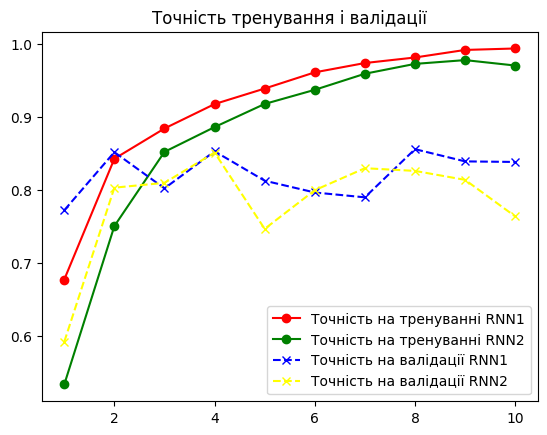

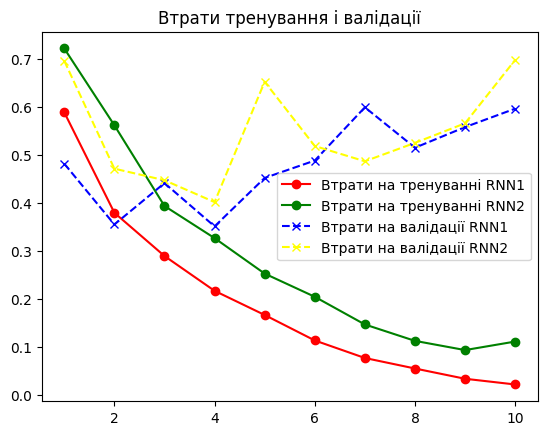

In [19]:
acc_1 = rnn_history_1.history['acc']
acc_2 = rnn_history_2.history['acc']

loss_1 = rnn_history_1.history['loss']
loss_2 = rnn_history_2.history['loss']

val_acc_1 = rnn_history_1.history['val_acc']
val_acc_2 = rnn_history_2.history['val_acc']

val_loss_1 = rnn_history_1.history['val_loss']
val_loss_2 = rnn_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_1, marker='o', linestyle='-', color='red', label='Точність на тренуванні RNN1')
plt.plot(epochs, acc_2, marker='o', linestyle='-', color='green', label='Точність на тренуванні RNN2')
plt.plot(epochs, val_acc_1, marker='x', linestyle='--', color='blue', label='Точність на валідації RNN1')
plt.plot(epochs, val_acc_2, marker='x', linestyle='--', color='yellow', label='Точність на валідації RNN2')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss_1, marker='o', linestyle='-', color='red', label='Втрати на тренуванні RNN1') 
plt.plot(epochs, loss_2, marker='o', linestyle='-', color='green', label='Втрати на тренуванні RNN2') 
plt.plot(epochs, val_loss_1, marker='x', linestyle='--', color='blue', label='Втрати на валідації RNN1')  
plt.plot(epochs, val_loss_2, marker='x', linestyle='--', color='yellow', label='Втрати на валідації RNN2') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## Результати після додавання шару Dropout показують поліпшення, але ознаки перенавчання все ще присутні.

Спробуємо EarlyStopping щоб зупинити навчання на більш ранньому етапі, коли валідаційна втрата починає зростати.

In [20]:
from keras.callbacks import EarlyStopping

rnn_model_3 = Sequential()
rnn_model_3.add(Embedding(max_features, 32))
rnn_model_3.add(SimpleRNN(32, kernel_regularizer=l2(0.001)))
rnn_model_3.add(Dropout(0.5))  # Збільшемо Dropout
rnn_model_3.add(Dense(1, activation='sigmoid'))

rnn_model_3.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=2, 
                               restore_best_weights=True)

rnn_history_3 = rnn_model_3.fit(input_train, 
                            y_train, 
                            epochs=10, 
                            batch_size=batch_size, 
                            validation_split=0.3,
                            callbacks=[early_stopping]) #Додамо EarlyStopping

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - acc: 0.5299 - loss: 0.7207 - val_acc: 0.6911 - val_loss: 0.6200
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - acc: 0.7888 - loss: 0.5092 - val_acc: 0.8394 - val_loss: 0.4117
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - acc: 0.8653 - loss: 0.3680 - val_acc: 0.8413 - val_loss: 0.3993
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.8971 - loss: 0.3021 - val_acc: 0.7602 - val_loss: 0.5311
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - acc: 0.9095 - loss: 0.2617 - val_acc: 0.8626 - val_loss: 0.3877
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.9362 - loss: 0.2014 - val_acc: 0.7736 - val_loss: 0.5311
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.9482 - loss: 0.1698 - val_acc: 0.8322 - val_loss: 0.4767


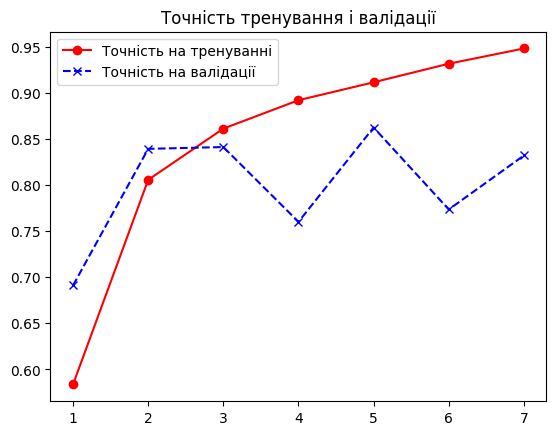

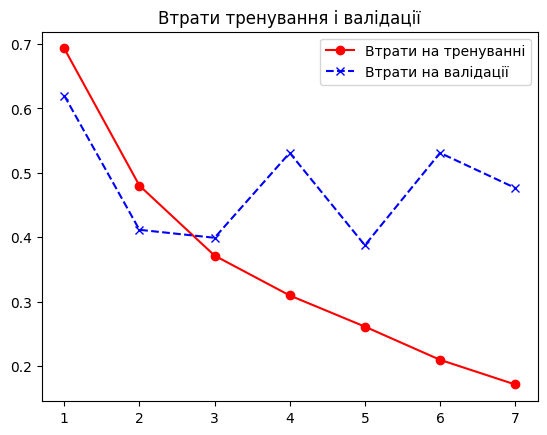

In [23]:
acc = rnn_history_3.history['acc']
loss = rnn_history_3.history['loss']

val_acc = rnn_history_3.history['val_acc']
val_loss = rnn_history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## EarlyStopping  допомогло запобігти подальшому погіршенню продуктивності через перенавчання. Незважаючи на поліпшення, ознаки перенавчання все ще спостерігаються. 

## LSTM

In [9]:
from keras.layers import LSTM

In [10]:
max_features = 10000 
maxlen = 250 
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Загальна кількість зразків тренувальних даних: {len(input_train)}")
print(f"Загальна кількість зразків тестових даних: {len(input_test)}")

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


lstm_model = Sequential()

lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))


lstm_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy']) 
lstm_model.summary()


lstm_history = lstm_model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.3
)
            

Загальна кількість зразків тренувальних даних: 25000
Загальна кількість зразків тестових даних: 25000


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 75s 243ms/step - accuracy: 0.6039 - loss: 0.6383 - val_accuracy: 0.7691 - val_loss: 0.4991
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 56s 204ms/step - accuracy: 0.8456 - loss: 0.3625 - val_accuracy: 0.8477 - val_loss: 0.3661
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 55s 200ms/step - accuracy: 0.8841 - loss: 0.2939 - val_accuracy: 0.8517 - val_loss: 0.3685
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 53s 192ms/step - accuracy: 0.9022 - loss: 0.2471 - val_accuracy: 0.8477 - val_loss: 0.3498
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 47s 170ms/step - accuracy: 0.9175 - loss: 0.2215 - val_accuracy: 0.8700 - val_loss: 0.3085
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.9277 - loss: 0.1976 - val_accuracy: 0.8591 - val_loss: 0.3257
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.9357 - loss: 0.1781 - val_accuracy: 0.8663 - val_loss: 0.3325
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 58s 211ms/step - accuracy: 0.9458 - loss: 0

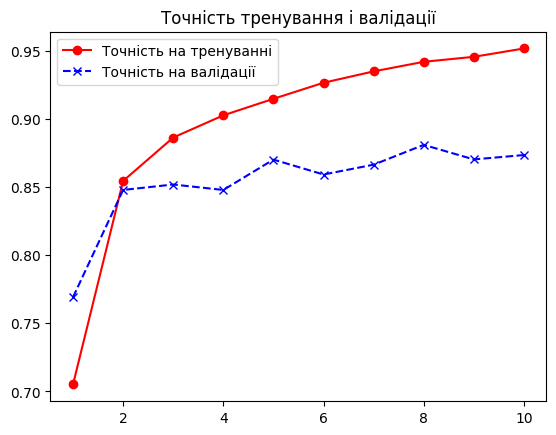

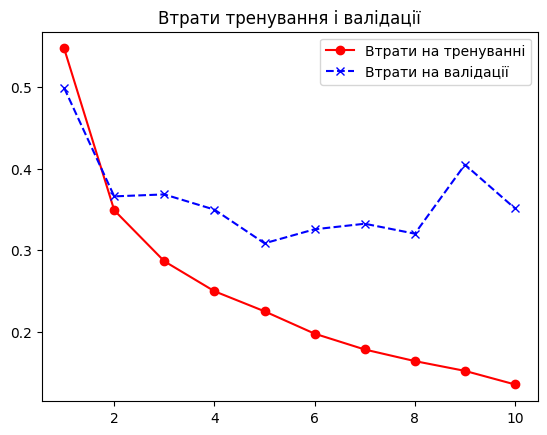

In [11]:
acc = lstm_history.history['accuracy']
loss = lstm_history.history['loss']

val_acc = lstm_history.history['val_accuracy']
val_loss = lstm_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## LSTM модель навчається трохи довше. Точність на тренувальних данних сягає 95,27%.
## LSTM показує більш стабільні результати і більш ефективно запобігає перенавчанню, ніж Simple RNN модель. 

## Bidirectional RNN

In [12]:
from keras.layers import Bidirectional

In [13]:
max_features = 10000 
maxlen = 250 
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

brrn_model = Sequential()
brrn_model.add(Embedding(max_features, 32))
brrn_model.add(Bidirectional(LSTM(32)))
brrn_model.add(Dense(1, activation='sigmoid'))


brrn_model.compile(loss='binary_crossentropy', 
                   optimizer='adam', 
                   metrics=['accuracy'])


brrn_history = brrn_model.fit(input_train,
                             y_train,
                             batch_size=batch_size, 
                             epochs=10,
                             validation_split=0.3)


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 97s 302ms/step - accuracy: 0.6571 - loss: 0.5881 - val_accuracy: 0.8580 - val_loss: 0.3452
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 76s 277ms/step - accuracy: 0.8944 - loss: 0.2753 - val_accuracy: 0.8739 - val_loss: 0.3067
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 85s 311ms/step - accuracy: 0.9316 - loss: 0.1868 - val_accuracy: 0.8765 - val_loss: 0.3100
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 77s 279ms/step - accuracy: 0.9538 - loss: 0.1337 - val_accuracy: 0.8651 - val_loss: 0.3642
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 71s 259ms/step - accuracy: 0.9622 - loss: 0.1162 - val_accuracy: 0.8708 - val_loss: 0.4095
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 65s 237ms/step - accuracy: 0.9710 - loss: 0.0870 - val_accuracy: 0.8700 - val_loss: 0.3880
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - accuracy: 0.9689 - loss: 0.0936 - val_accuracy: 0.8668 - val_loss: 0.4221
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 73s 265ms/step - accuracy: 0.9800 - loss: 0

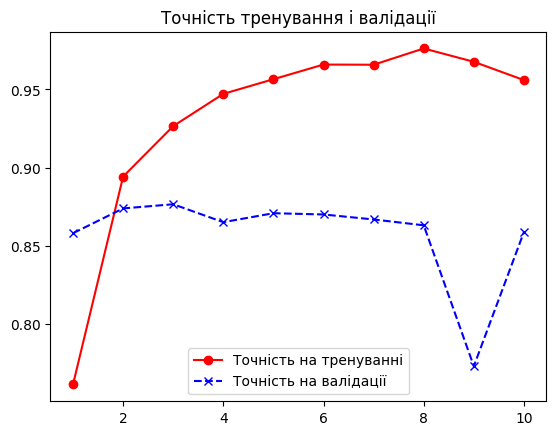

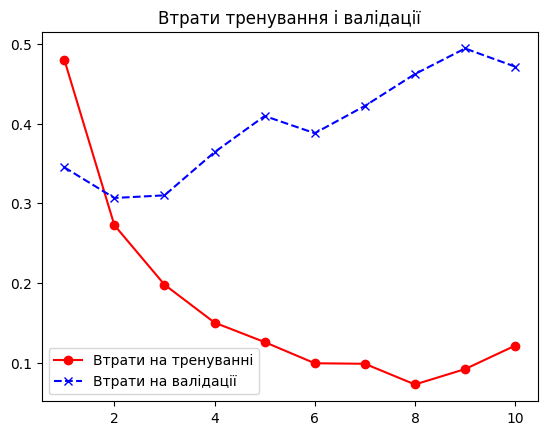

In [14]:
acc = brrn_history.history['accuracy']
loss = brrn_history.history['loss']

val_acc = brrn_history.history['val_accuracy']
val_loss = brrn_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## Модель Bidirectional RNN показує гарну точність на тренувальних даних - 95,42%. Однак на валідаційних даних точність стає нижчою, ніж у моделі, що використовує просто LSTM. Це каже про те, що ця модель схильна до перенавчання або має проблеми з узагальненням.

## Глибока

In [15]:
max_features = 10000 
maxlen = 250 
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


deep_model = Sequential()
deep_model.add(Embedding(max_features, 32))
deep_model.add(LSTM(32, return_sequences=True))
deep_model.add(LSTM(32))
deep_model.add(Dense(1, activation='sigmoid'))

deep_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_history = deep_model.fit(input_train,
                              y_train,
                              epochs=10,
                              batch_size=batch_size,
                              validation_split=0.3
                              )
                   

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 293ms/step - accuracy: 0.6053 - loss: 0.6298 - val_accuracy: 0.8268 - val_loss: 0.4042
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 84s 308ms/step - accuracy: 0.8454 - loss: 0.3701 - val_accuracy: 0.8536 - val_loss: 0.3405
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 78s 285ms/step - accuracy: 0.8877 - loss: 0.2869 - val_accuracy: 0.8787 - val_loss: 0.3197
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 80s 293ms/step - accuracy: 0.9000 - loss: 0.2559 - val_accuracy: 0.8601 - val_loss: 0.3391
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 78s 286ms/step - accuracy: 0.9248 - loss: 0.2057 - val_accuracy: 0.8641 - val_loss: 0.3492
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 84s 308ms/step - accuracy: 0.9337 - loss: 0.1802 - val_accuracy: 0.8523 - val_loss: 0.3852
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9430 - loss: 0.1610 - val_accuracy: 0.8600 - val_loss: 0.4225
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 81s 295ms/step - accuracy: 0.9508 - loss: 0

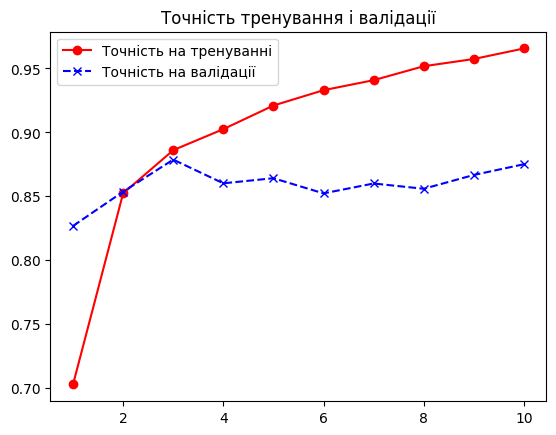

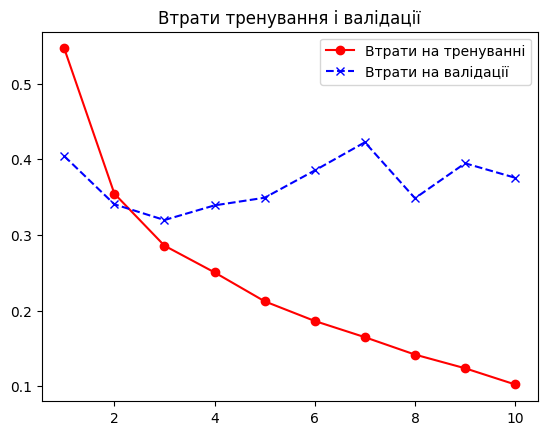

In [16]:
acc = deep_history.history['accuracy']
loss = deep_history.history['loss']

val_acc = deep_history.history['val_accuracy']
val_loss = deep_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## Точність на тренувальних даних сягає 96,74%.
## Модель добре навчається і здатна узагальнювати дані на валідаційному наборі. Однак можливе перенавчання.

Додамо шар Dropout після кожного шару LSTM 

In [24]:
deep_model_2 = Sequential()
deep_model_2.add(Embedding(max_features, 32))
deep_model_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
deep_model_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
deep_model_2.add(Dense(1, activation='sigmoid'))

deep_model_2.compile(optimizer='rmsprop',
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

deep_history_2 = deep_model_2.fit(input_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.3)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 250ms/step - accuracy: 0.5632 - loss: 0.6643 - val_accuracy: 0.8026 - val_loss: 0.4378
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.8214 - loss: 0.4168 - val_accuracy: 0.8419 - val_loss: 0.3666
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.8691 - loss: 0.3377 - val_accuracy: 0.8460 - val_loss: 0.3590
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.8890 - loss: 0.2877 - val_accuracy: 0.8645 - val_loss: 0.3280
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 228ms/step - accuracy: 0.9029 - loss: 0.2639 - val_accuracy: 0.7504 - val_loss: 0.5817
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.9094 - loss: 0.2403 - val_accuracy: 0.8538 - val_loss: 0.3513
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.9217 - loss: 0.2156 - val_accuracy: 0.8314 - val_loss: 0.4171
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 236ms/step - accuracy: 0.9218 - loss: 0

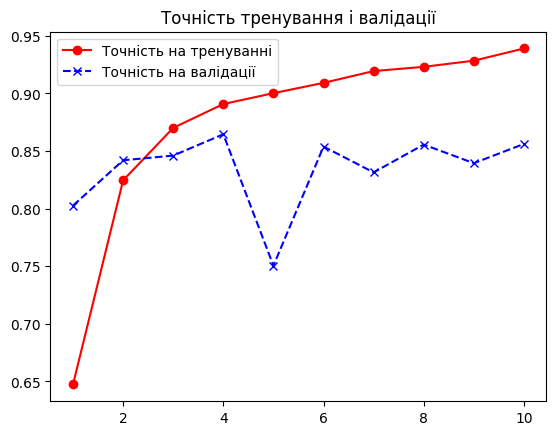

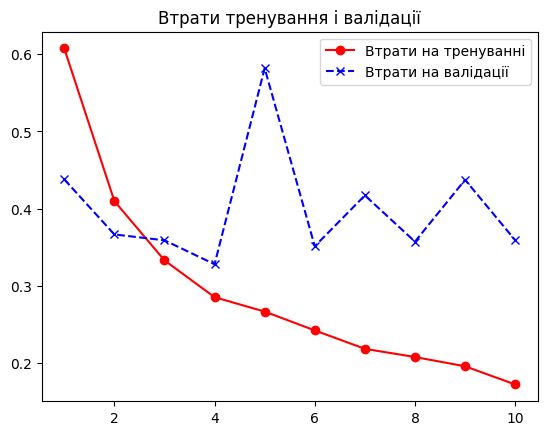

In [26]:
acc = deep_history_2.history['accuracy']
loss = deep_history_2.history['loss']

val_acc = deep_history_2.history['val_accuracy']
val_loss = deep_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

## Додавання шарів Dropout після кожного шару LSTM трішки допомогло поліпшити результати порівняно з моделлю deep_model без регуляризації. Однак є деякий розрив між точністю на навчальному і валідаційному наборах даних, це вказує на деяке перенавчання.

Спробуємо оптимізатор Adam

In [28]:
deep_model_3 = Sequential()
deep_model_3.add(Embedding(max_features, 32))
deep_model_3.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
deep_model_3.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
deep_model_3.add(Dense(1, activation='sigmoid'))

deep_model_3.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_history_3 = deep_model_3.fit(input_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.3)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 253ms/step - accuracy: 0.6212 - loss: 0.6200 - val_accuracy: 0.8114 - val_loss: 0.4172
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.8686 - loss: 0.3372 - val_accuracy: 0.8283 - val_loss: 0.4014
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.8956 - loss: 0.2774 - val_accuracy: 0.8357 - val_loss: 0.3887
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.9122 - loss: 0.2376 - val_accuracy: 0.8279 - val_loss: 0.4258
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 243ms/step - accuracy: 0.9257 - loss: 0.2079 - val_accuracy: 0.8449 - val_loss: 0.3907
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 244ms/step - accuracy: 0.9426 - loss: 0.1618 - val_accuracy: 0.8413 - val_loss: 0.4094
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 243ms/step - accuracy: 0.9415 - loss: 0.1637 - val_accuracy: 0.8197 - val_loss: 0.4539
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 243ms/step - accuracy: 0.9511 - loss: 0

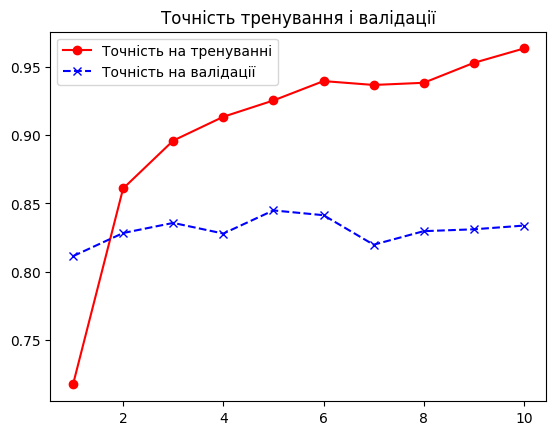

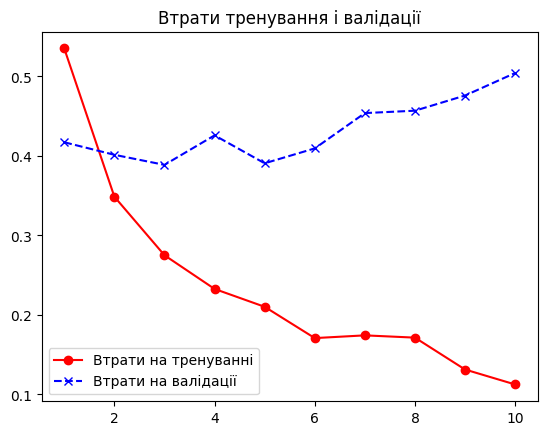

In [29]:
acc = deep_history_3.history['accuracy']
loss = deep_history_3.history['loss']

val_acc = deep_history_3.history['val_accuracy']
val_loss = deep_history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації') 
plt.legend()  

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')  
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show() 

## Оптимізатор Adam не дав значного поліпшення порівняно з попередніми результатами.

## Загальний висновок:
1. RNN має проблеми з перенавчанням, на нових данних похибка буде значною.
2. LSTM досягла високої точності на валідаційних данних 87%, є більш складною для навчання, порівняно з RNN
3. Bidirectional RNN досягла високої точності на валідаційних данних 87%, більш складна за попередні 2, вона потребує більше обчислювальної потужності та часу для досягнення хороших результатів. Але обираючии серед 4 варіантів, я б обирала роботу саме з цією моделлю.
4. Deep LSTM досягла високої точності на валідаційних данних 87,5% може обробляти складніші залежності в даних, оскільки має кілька шарів LSTM, є ризик перенавчання. 